<a href="https://colab.research.google.com/github/nameisdheeraj/Malaria-detection-using-image-processing/blob/main/Malaria_Detection_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle as pickle


In [ ]:
# infected_images = os.listdir('/content/drive/MyDrive/Kaggle/Datasets/malaria/cell_images/Parasitized')
# infected_path = '/content/drive/MyDrive/Kaggle/Datasets/malaria/cell_images/Parasitized'

# uninfected_images = os.listdir('/content/drive/MyDrive/Kaggle/Datasets/malaria/cell_images/Uninfected')
# uninfected_path = '/content/drive/MyDrive/Kaggle/Datasets/malaria/cell_images/Uninfected'

# print(len(infected_images))
# print(len(uninfected_images))

In [ ]:
# x = []
# y = []

# for img in infected_images:
#   actual_image = cv2.imread(infected_path + '/' + img)
#   print("\r",end="")
#   print("\rProcessed {0} images".format(img),end="")
#   final_image = cv2.resize(actual_image, (128,128), interpolation = cv2.INTER_CUBIC)
#   x.append(final_image)
#   y.append(1)

# for img in uninfected_images:
#   actual_image = cv2.imread(uninfected_path + '/' + img)
#   print("\r",end="")
#   print("\rProcessed {0} images".format(img),end="")
#   final_image = cv2.resize(actual_image, (128,128), interpolation = cv2.INTER_CUBIC)
#   x.append(final_image)
#   y.append(0)

Processed C109P70ThinF_IMG_20150930_103214_cell_54.png images

In [ ]:
# with open( "/content/drive/MyDrive/Kaggle/Projects/Malaria detection/x.p", "wb" ) as pickle_f:
#     pickle.dump(x, pickle_f )

# with open( "/content/drive/MyDrive/Kaggle/Projects/Malaria detection/y.p", "wb" ) as pickle_f:
#     pickle.dump(y, pickle_f )


In [ ]:
x = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/Malaria detection/x.p', 'rb'))
y = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/Malaria detection/y.p', 'rb'))

x = np.array(x)
y = np.array(y)

print(len(x),len(y))

27558 27558


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=101, test_size=0.2)
y_train = to_categorical(y_train, num_classes = 2)
y_valid = to_categorical(y_valid, num_classes = 2)

In [ ]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(22046, 128, 128, 3)
(5512, 128, 128, 3)
(22046, 2)
(5512, 2)


In [ ]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
os.environ['PYTHONHASHSEED'] = str(2)
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

from tensorflow.random import set_seed
set_seed(2)

In [ ]:
# tf.keras.backend.clear_session()
# model.reset_states()

input_layer = Input([128,128,3])
conv1 = Conv2D(filters = 128, kernel_size = (3,3), padding='same', activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)

conv2 = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size = (2,2), strides = (2,2))(conv2)

conv3 = Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size= (2,2), strides = (2,2))(conv3)

conv4 = Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation='relu')(pool2)
pool4 = MaxPooling2D(pool_size= (2,2), strides = (2,2))(conv4)

flatten = Flatten()(pool3)
dense1 = Dense(512, activation='relu')(flatten)
output_layer = Dense(2, activation='sigmoid')(dense1)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0     

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, batch_size = 32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
552/552 [==============================] - 24s 36ms/step - loss: 3.1736 - accuracy: 0.5764 - val_loss: 0.6575 - val_accuracy: 0.6129
Epoch 2/15
552/552 [==============================] - 19s 35ms/step - loss: 0.6138 - accuracy: 0.6627 - val_loss: 0.6439 - val_accuracy: 0.6363
Epoch 3/15
552/552 [==============================] - 19s 35ms/step - loss: 0.5212 - accuracy: 0.7378 - val_loss: 0.2016 - val_accuracy: 0.9408
Epoch 4/15
552/552 [==============================] - 19s 34ms/step - loss: 0.1474 - accuracy: 0.9510 - val_loss: 0.1708 - val_accuracy: 0.9472
Epoch 5/15
552/552 [==============================] - 19s 34ms/step - loss: 0.0800 - accuracy: 0.9744 - val_loss: 0.1962 - val_accuracy: 0.9420
Epoch 6/15
552/552 [==============================] - 19s 34ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.2338 - val_accuracy: 0.9440
Epoch 7/15
552/552 [==============================] - 19s 34ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.2902 - val_accuracy:

In [ ]:
model.save('/content/drive/MyDrive/Kaggle/Projects/Malaria detection/model_2.h5')

In [ ]:
with open('/content/drive/MyDrive/Kaggle/Projects/Malaria detection/model_2_history.p','wb') as pickle_f:
  pickle.dump(history.history,pickle_f)

# Model 1 


In [ ]:
from keras.models import load_model 
loaded_model_1 = load_model('/content/drive/MyDrive/Kaggle/Projects/Malaria detection/model_1.h5')

In [ ]:
from sklearn.metrics import classification_report
pred_model_1 = loaded_model_1.predict(x_valid)
print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred_model_1, axis = 1)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2721
           1       0.94      0.95      0.95      2791

    accuracy                           0.95      5512
   macro avg       0.95      0.94      0.95      5512
weighted avg       0.95      0.95      0.95      5512



In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize = False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[2557  164]
 [ 139 2652]]


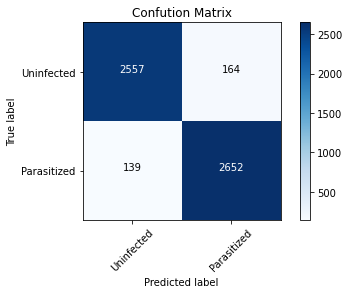

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools  
cm_plot_labels = ['Uninfected', 'Parasitized']
cm = confusion_matrix(np.argmax(y_valid, axis = 1),np.argmax(pred_model_1, axis = 1))
plot_confusion_matrix(cm = cm , classes= cm_plot_labels , title='Confution Matrix')

#Model 2

In [ ]:
loaded_model_2 = load_model('/content/drive/MyDrive/Kaggle/Projects/Malaria detection/model_2.h5')

In [ ]:
history_model_2 = pickle.load(open('/content/drive/MyDrive/Kaggle/Projects/Malaria detection/model_2_history.p','rb'))

In [ ]:
history_model_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

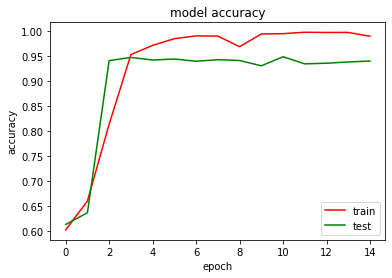

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(history_model_2['accuracy'], color='red')
ax.plot(history_model_2['val_accuracy'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
pred_model_2 = loaded_model_2.predict(x_valid)
print(classification_report(np.argmax(y_valid, axis = 1),np.argmax(pred_model_2, axis = 1)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2721
           1       0.95      0.92      0.94      2791

    accuracy                           0.94      5512
   macro avg       0.94      0.94      0.94      5512
weighted avg       0.94      0.94      0.94      5512



Confusion matrix without normalization
[[2600  121]
 [ 232 2559]]


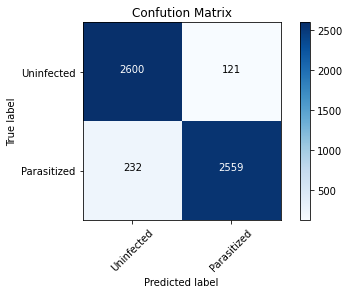

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools  
cm_plot_labels = ['Uninfected', 'Parasitized']
cm = confusion_matrix(np.argmax(y_valid, axis = 1),np.argmax(pred_model_2, axis = 1))
plot_confusion_matrix(cm = cm , classes= cm_plot_labels , title='Confution Matrix')